In [1]:
from df_grid_display import show_excel_like 

In [2]:
# Import Data Profile Excel file name 'ProcessParasProfileUTL'
import pandas as pd

# Specify the path to your Excel file and the sheet names to import
#excel_path = 'your_excel_file.xlsx'
#sheet_names = ['Sheet1', 'Sheet2']  # Replace with your sheet names
excel_path = 'PPP.xlsx'
sheet_names = ['ProcessParasProfileUTL']  # Replace with your sheet names

# Read the specified sheets into a dictionary of DataFrames
dfs2 = pd.read_excel(
    excel_path,
    sheet_name=sheet_names,
    engine='openpyxl'  # Required for .xlsx files
)

# Access DataFrames using the sheet names as keys
# Example:
# df_sheet1 = dfs['Sheet1']
# df_sheet2 = dfs['Sheet2']
df4 = dfs2['ProcessParasProfileUTL']

In [3]:
# intialise data of lists of ECID and SVID parameter groups
col_ECID = {'EquipID':'object', 'CreateTime':'datetime64[ns]','CreateTimeUnix':'int64','EventDesc':'object','4280':'float32','4290':'float32','6603':'float32','6611':'float32',
            '6607':'float32','6615':'float32','4628':'float32','4629':'float32','6641':'float32','16009':'float32','16058':'float32',
            '6640':'float32','16008':'float32','16057':'float32','6636':'float32','16004':'float32','16053':'float32','6637':'float32',
            '16005':'float32','16054':'float32','6666':'float32','16034':'float32','16132':'float32','4204':'float32','4205':'float32'}
col_SVID = {'EquipID':'object', 'CreateTime':'datetime64[ns]','CreateTimeUnix':'int64','EventDesc':'object','1404':'float32','1405':'float32','3223':'float32','1412':'float32',
            '1413':'float32','1400':'float32','1401':'float32','1763':'float32','1765':'float32','1352':'float32','1353':'float32',
            '1771':'float32','1775':'float32','1502':'float32','1503':'float32','1760':'float32','1759':'float32','1755':'float32',
            '1756':'float32','1500':'float32','1501':'float32','1785':'float32','1764':'float32','1766':'float32'}

# Create DataFrame
ECID = pd.DataFrame({
    col: pd.Series(dtype=dtype) for col, dtype in col_ECID.items()
})
SVID = pd.DataFrame({
    col: pd.Series(dtype=dtype) for col, dtype in col_SVID.items()
})

In [4]:
#import 'PPCDataUTL' to df3 dataframe
import os

# Set the path to your folder containing 'PPCDataUTL' Excel files
folder_path = 'myfolder'

# Initialize empty DataFrames to store data from all files
df3 = pd.DataFrame()

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.xlsx'):  # Process only .xlsx files
        excel_path = os.path.join(folder_path, filename)
        
        try:
            # Read both sheets from the Excel file
            dfs2 = pd.read_excel(
                excel_path,
                #sheet_name=['PPCDataUTL', 'ProcessParasProfileUTL'],
                engine='openpyxl'
            )
            
            # Append data to df3 and df4
            df3 = pd.concat([df3, dfs2], axis=0)
            
        except Exception as e:
            print(f"Error reading file {filename}: {e}")
            continue

# Optional: If you want to reset the index after concatenation
df3.reset_index(drop=True, inplace=True)

# print("Data has been read from all files and combined into df3 and df4.")
df3 = df3.drop(['EquipOpn', 'ULotID','EventID'], axis=1)
df3 = df3.sort_values(by=['EquipID', 'CreateTime'])

In [5]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020203 entries, 252765 to 748890
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   EquipID                 1020203 non-null  object        
 1   Recipe                  1020203 non-null  object        
 2   Parameter               1020203 non-null  object        
 3   CreateTime              1020203 non-null  datetime64[ns]
 4   EventDesc               1020203 non-null  object        
 5   SAW_ProductionStock_Z1  1008360 non-null  object        
 6   BladeOD_Z1              1008360 non-null  float64       
 7   BladeThickness_Z1       1008360 non-null  float64       
 8   FlangeODType_Z1         1008360 non-null  object        
 9   SAW_ProductionStock_Z2  1008360 non-null  object        
 10  BladeOD_Z2              1008360 non-null  float64       
 11  BladeThickness_Z2       1008360 non-null  float64       
 12  FlangeODType_Z2

In [6]:
# Split the string into key-value pairs
def get_parameter(s):
    pairs = s.split(',')
    
    # Initialize an empty dictionary
    parameter = {}
    
    # Process each pair and convert to integers
    for pair in pairs:
        key_str, value_str = pair.split(':')
        key = int(key_str)
        if value_str != 'System.Byte[]':   # Skip key_str when value_str is undefined !!!!
            value = int(value_str)
            parameter[key] = value
    
    return(parameter)

In [7]:
from tqdm import tqdm
for indx in tqdm(df3.index, desc="Updating DataFrame rows"):
    # get parameter from df3 column 2
    parameter = get_parameter(df3.iloc[indx,2])

    # Add multiple entries
    parameter.update({'EquipID': df3.iloc[indx,0], 'CreateTime': df3.iloc[indx,3], 'EventDesc': df3.iloc[indx,4]})

    # Convert integer keys to strings **** Importance ****
    parameter = {str(k): v for k, v in parameter.items()}
    value = parameter.get('1404', 0)
    if value > 0: # it is SVID record
        SVID = pd.concat([SVID, pd.DataFrame([parameter]).reindex(columns=SVID.columns)],ignore_index=True)
    value = parameter.get('4280', 0)
    if value > 0: # it is ECID record
        ECID = pd.concat([ECID, pd.DataFrame([parameter]).reindex(columns=ECID.columns)],ignore_index=True)    

Updating DataFrame rows: 100%|█████████████████████████████████████████████| 1020203/1020203 [5:28:38<00:00, 51.74it/s]


In [8]:
df3['CreateTimeUnix'] = df3['CreateTime'].astype('int64') // 10**9
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020203 entries, 252765 to 748890
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   EquipID                 1020203 non-null  object        
 1   Recipe                  1020203 non-null  object        
 2   Parameter               1020203 non-null  object        
 3   CreateTime              1020203 non-null  datetime64[ns]
 4   EventDesc               1020203 non-null  object        
 5   SAW_ProductionStock_Z1  1008360 non-null  object        
 6   BladeOD_Z1              1008360 non-null  float64       
 7   BladeThickness_Z1       1008360 non-null  float64       
 8   FlangeODType_Z1         1008360 non-null  object        
 9   SAW_ProductionStock_Z2  1008360 non-null  object        
 10  BladeOD_Z2              1008360 non-null  float64       
 11  BladeThickness_Z2       1008360 non-null  float64       
 12  FlangeODType_Z2

In [9]:
SVID['CreateTimeUnix'] = SVID['CreateTime'].astype('int64') // 10**9
SVID = SVID.astype(col_SVID)
SVID.sort_values(by=['EquipID', 'CreateTime'])
##SVID.info()

,EquipID,CreateTime,CreateTimeUnix,EventDesc,1404,1405,3223,1412,1413,1400,...,1503,1760,1759,1755,1756,1500,1501,1785,1764,1766
198059,TSWD036,2025-03-17 00:02:11.533,1742169731,Kerf Check Start,4930.0,3944.0,NaN,34510.0,16762.0,0.0,...,1060.0,204.0,205.0,137.0,128.0,40000.0,50000.0,417.0,40000.0,49960.0
151697,TSWD036,2025-03-17 00:06:13.193,1742169973,Kerf Check End,986.0,9860.0,NaN,33524.0,17748.0,-493.0,...,1060.0,204.0,205.0,134.0,130.0,40000.0,49960.0,217.0,40000.0,50000.0
413956,TSWD036,2025-03-17 00:08:57.073,1742170137,Kerf Check Start,986.0,9860.0,NaN,33524.0,17748.0,-493.0,...,1060.0,135.0,205.0,136.0,205.0,40000.0,49960.0,216.0,40000.0,49960.0
238149,TSWD036,2025-03-17 00:09:11.087,1742170151,Kerf Check End,1972.0,1972.0,NaN,33524.0,17748.0,-493.0,...,1080.0,205.0,205.0,136.0,204.0,40000.0,49960.0,216.0,40000.0,49960.0
157725,TSWD036,2025-03-17 00:11:23.017,1742170283,Kerf Check Start,1972.0,1972.0,NaN,33524.0,17748.0,-493.0,...,1080.0,137.0,205.0,136.0,204.0,40000.0,49960.0,217.0,39970.0,49960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403507,TSWD299,2025-03-20 23:57:46.990,1742515066,Cut Start,11784.0,10802.0,283.0,36334.0,26514.0,0.0,...,1160.0,207.0,205.0,130.0,134.0,49950.0,49950.0,525.0,49950.0,49950.0
387441,TSWD299,2025-03-20 23:58:05.937,1742515085,Kerf Check Start,11784.0,10802.0,312.0,36334.0,26514.0,0.0,...,810.0,207.0,205.0,130.0,133.0,49950.0,50000.0,503.0,50000.0,49950.0
3130,TSWD299,2025-03-20 23:58:19.580,1742515099,Kerf Check End,1964.0,10802.0,314.0,36334.0,26514.0,0.0,...,1220.0,207.0,205.0,130.0,134.0,49950.0,49950.0,525.0,49950.0,50000.0
395466,TSWD299,2025-03-20 23:59:15.343,1742515155,Kerf Check Start,1964.0,10802.0,294.0,36334.0,26514.0,0.0,...,810.0,207.0,205.0,130.0,134.0,49950.0,50000.0,507.0,49950.0,49950.0


In [10]:
ECID['CreateTimeUnix'] = ECID['CreateTime'].astype('int64') // 10**9
ECID = ECID.astype(col_ECID)
ECID.sort_values(by=['EquipID', 'CreateTime'])
##ECID.info()

,EquipID,CreateTime,CreateTimeUnix,EventDesc,4280,4290,6603,6611,6607,6615,...,16004,16053,6637,16005,16054,6666,16034,16132,4204,4205
218894,TSWD036,2025-03-17 00:02:11.510,1742169731,Kerf Check Start,19050000.0,19050000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000.0,50000.0
197972,TSWD036,2025-03-17 00:02:26.060,1742169746,Kerf Check End,19050000.0,19050000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000.0,50000.0
174168,TSWD036,2025-03-17 00:03:07.220,1742169787,Kerf Check Start,19050000.0,19050000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000.0,50000.0
468716,TSWD036,2025-03-17 00:03:11.690,1742169791,Kerf Check End,19050000.0,19050000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000.0,50000.0
399077,TSWD036,2025-03-17 00:05:59.147,1742169959,Kerf Check Start,19050000.0,19050000.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40000.0,50000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445392,TSWD299,2025-03-20 23:57:46.803,1742515066,Cut Start,50800000.0,50800000.0,1000.0,800.0,1000.0,800.0,...,NaN,NaN,-700.0,NaN,NaN,200.0,NaN,NaN,50000.0,50000.0
427749,TSWD299,2025-03-20 23:58:05.707,1742515085,Kerf Check Start,50800000.0,50800000.0,1000.0,800.0,1000.0,800.0,...,NaN,NaN,-700.0,NaN,NaN,200.0,NaN,NaN,50000.0,50000.0
3460,TSWD299,2025-03-20 23:58:19.393,1742515099,Kerf Check End,50800000.0,50800000.0,1000.0,800.0,1000.0,800.0,...,NaN,NaN,-700.0,NaN,NaN,200.0,NaN,NaN,50000.0,50000.0
436579,TSWD299,2025-03-20 23:59:15.157,1742515155,Kerf Check Start,50800000.0,50800000.0,1000.0,800.0,1000.0,800.0,...,NaN,NaN,-700.0,NaN,NaN,200.0,NaN,NaN,50000.0,50000.0


In [11]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1020203 entries, 252765 to 748890
Data columns (total 14 columns):
 #   Column                  Non-Null Count    Dtype         
---  ------                  --------------    -----         
 0   EquipID                 1020203 non-null  object        
 1   Recipe                  1020203 non-null  object        
 2   Parameter               1020203 non-null  object        
 3   CreateTime              1020203 non-null  datetime64[ns]
 4   EventDesc               1020203 non-null  object        
 5   SAW_ProductionStock_Z1  1008360 non-null  object        
 6   BladeOD_Z1              1008360 non-null  float64       
 7   BladeThickness_Z1       1008360 non-null  float64       
 8   FlangeODType_Z1         1008360 non-null  object        
 9   SAW_ProductionStock_Z2  1008360 non-null  object        
 10  BladeOD_Z2              1008360 non-null  float64       
 11  BladeThickness_Z2       1008360 non-null  float64       
 12  FlangeODType_Z2

In [12]:
import duckdb

# Query directly on the DataFrame (no need to load into a database)
result = duckdb.sql("""
    SELECT df3.EquipID, Recipe, df3.CreateTime, df3.CreateTimeUnix, df3.EventDesc,
    SAW_ProductionStock_Z1, BladeOD_Z1, BladeThickness_Z1, FlangeODType_Z1,
    SAW_ProductionStock_Z2, BladeOD_Z2, BladeThickness_Z2, FlangeODType_Z2,
    ECID."4280" AS ECID_4280, 
    ECID."4290" AS ECID_4290, 
    ECID."6603" AS ECID_6603, 
    ECID."6611" AS ECID_6611,
    ECID."6607" AS ECID_6607, 
    ECID."6615" AS ECID_6615, 
    ECID."4628" AS ECID_4628,
    ECID."4629" AS ECID_4629,
    ECID."6641" AS ECID_6641,
    ECID."16009" AS ECID_16009,
    ECID."16058" AS ECID_16058,
    ECID."6640" AS ECID_6640,
    ECID."16008" AS ECID_16008,
    ECID."16057" AS ECID_16057,
    ECID."6636" AS ECID_6636,
    ECID."16004" AS ECID_16004,
    ECID."16053" AS ECID_16053,
    ECID."6637" AS ECID_6637,
    ECID."16005" AS ECID_16005,
    ECID."16054" AS ECID_16054,
    ECID."6666" AS ECID_6666,
    ECID."16034" AS ECID_16034,
    ECID."16132" AS ECID_16132,
    ECID."4204" AS ECID_4204,
    ECID."4205" AS ECID_4205,
    SVID."1404" AS SVID_1404,
    SVID."1405" AS SVID_1405,
    SVID."3223" AS SVID_3223,
    SVID."1412" AS SVID_1412,
    SVID."1413" AS SVID_1413,
    SVID."1400" AS SVID_1400,
    SVID."1401" AS SVID_1401,
    SVID."1763" AS SVID_1763,
    SVID."1765" AS SVID_1765,
    SVID."1352" AS SVID_1352,
    SVID."1353" AS SVID_1353,
    SVID."1771" AS SVID_1771,
    SVID."1775" AS SVID_1775,
    SVID."1502" AS SVID_1502,
    SVID."1503" AS SVID_1503,
    SVID."1760" AS SVID_1760,
    SVID."1759" AS SVID_1759,
    SVID."1755" AS SVID_1755,
    SVID."1756" AS SVID_1756,
    SVID."1500" AS SVID_1500,
    SVID."1501" AS SVID_1501,
    SVID."1785" AS SVID_1785,
    SVID."1764" AS SVID_1764,
    SVID."1766" AS SVID_1766
    FROM df3, SVID, ECID
    WHERE df3.EquipID = SVID.EquipID AND df3.EquipID = ECID.EquipID 
    AND df3.CreateTimeUnix = SVID.CreateTimeUnix AND df3.CreateTimeUnix = ECID.CreateTimeUnix
    AND df3.EventDesc = SVID.EventDesc AND df3.EventDesc = ECID.EventDesc AND df3.Parameter LIKE '4280%'
    AND df3.CreateTimeUnix = 1742427315 
    AND ECID.EquipID = 'TSWD036' 
""").to_df()
result

,EquipID,Recipe,CreateTime,CreateTimeUnix,EventDesc,SAW_ProductionStock_Z1,BladeOD_Z1,BladeThickness_Z1,FlangeODType_Z1,SAW_ProductionStock_Z2,...,SVID_1503,SVID_1760,SVID_1759,SVID_1755,SVID_1756,SVID_1500,SVID_1501,SVID_1785,SVID_1764,SVID_1766
0,TSWD036,STM0533P_J_1,2025-03-19 23:35:15.370,1742427315,Kerf Check Start,SW00000144,2.1874,0.0019,Hub,SW00000146,...,1060.0,205.0,205.0,135.0,129.0,54940.0,49960.0,424.0,54940.0,50000.0


In [13]:
# Query directly on the DataFrame (no need to load into a database)
result = duckdb.sql("""
    SELECT df3.EquipID, Recipe, df3.CreateTime, df3.CreateTimeUnix, df3.EventDesc,
    SAW_ProductionStock_Z1, BladeOD_Z1, BladeThickness_Z1, FlangeODType_Z1,
    SAW_ProductionStock_Z2, BladeOD_Z2, BladeThickness_Z2, FlangeODType_Z2,
    ECID."4280" AS ECID_4280, 
    ECID."4290" AS ECID_4290, 
    ECID."6603" AS ECID_6603, 
    ECID."6611" AS ECID_6611,
    ECID."6607" AS ECID_6607, 
    ECID."6615" AS ECID_6615, 
    ECID."4628" AS ECID_4628,
    ECID."4629" AS ECID_4629,
    ECID."6641" AS ECID_6641,
    ECID."16009" AS ECID_16009,
    ECID."16058" AS ECID_16058,
    ECID."6640" AS ECID_6640,
    ECID."16008" AS ECID_16008,
    ECID."16057" AS ECID_16057,
    ECID."6636" AS ECID_6636,
    ECID."16004" AS ECID_16004,
    ECID."16053" AS ECID_16053,
    ECID."6637" AS ECID_6637,
    ECID."16005" AS ECID_16005,
    ECID."16054" AS ECID_16054,
    ECID."6666" AS ECID_6666,
    ECID."16034" AS ECID_16034,
    ECID."16132" AS ECID_16132,
    ECID."4204" AS ECID_4204,
    ECID."4205" AS ECID_4205,
    SVID."1404" AS SVID_1404,
    SVID."1405" AS SVID_1405,
    SVID."3223" AS SVID_3223,
    SVID."1412" AS SVID_1412,
    SVID."1413" AS SVID_1413,
    SVID."1400" AS SVID_1400,
    SVID."1401" AS SVID_1401,
    SVID."1763" AS SVID_1763,
    SVID."1765" AS SVID_1765,
    SVID."1352" AS SVID_1352,
    SVID."1353" AS SVID_1353,
    SVID."1771" AS SVID_1771,
    SVID."1775" AS SVID_1775,
    SVID."1502" AS SVID_1502,
    SVID."1503" AS SVID_1503,
    SVID."1760" AS SVID_1760,
    SVID."1759" AS SVID_1759,
    SVID."1755" AS SVID_1755,
    SVID."1756" AS SVID_1756,
    SVID."1500" AS SVID_1500,
    SVID."1501" AS SVID_1501,
    SVID."1785" AS SVID_1785,
    SVID."1764" AS SVID_1764,
    SVID."1766" AS SVID_1766
    FROM df3, SVID, ECID
    WHERE df3.EquipID = SVID.EquipID AND df3.EquipID = ECID.EquipID 
    AND df3.CreateTimeUnix = SVID.CreateTimeUnix AND df3.CreateTimeUnix = ECID.CreateTimeUnix AND df3.Parameter LIKE '4280%'
    ORDER BY df3.EquipID, df3.CreateTime ASC
""").to_df()
result

,EquipID,Recipe,CreateTime,CreateTimeUnix,EventDesc,SAW_ProductionStock_Z1,BladeOD_Z1,BladeThickness_Z1,FlangeODType_Z1,SAW_ProductionStock_Z2,...,SVID_1503,SVID_1760,SVID_1759,SVID_1755,SVID_1756,SVID_1500,SVID_1501,SVID_1785,SVID_1764,SVID_1766
0,TSWD036,STM0533P_J_2,2025-03-17 00:02:11.510,1742169731,Kerf Check Start,SW00000206,2.1874,0.0010,Hub,SW00000152,...,1060.0,204.0,205.0,137.0,128.0,40000.0,50000.0,417.0,40000.0,49960.0
1,TSWD036,STM0533P_J_2,2025-03-17 00:06:13.177,1742169973,Kerf Check End,SW00000206,2.1874,0.0010,Hub,SW00000152,...,1060.0,204.0,205.0,134.0,130.0,40000.0,49960.0,217.0,40000.0,50000.0
2,TSWD036,STM0533P_J_2,2025-03-17 00:08:57.053,1742170137,Kerf Check Start,SW00000206,2.1874,0.0010,Hub,SW00000152,...,1060.0,135.0,205.0,136.0,205.0,40000.0,49960.0,216.0,40000.0,49960.0
3,TSWD036,STM0533P_J_2,2025-03-17 00:09:11.063,1742170151,Kerf Check End,SW00000206,2.1874,0.0010,Hub,SW00000152,...,1080.0,205.0,205.0,136.0,204.0,40000.0,49960.0,216.0,40000.0,49960.0
4,TSWD036,STM0533P_J_2,2025-03-17 00:11:23.003,1742170283,Kerf Check Start,SW00000206,2.1874,0.0010,Hub,SW00000152,...,1080.0,137.0,205.0,136.0,204.0,40000.0,49960.0,217.0,39970.0,49960.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460434,TSWD299,ISL0593P_D_3,2025-03-20 23:57:46.803,1742515066,Cut Start,SW00000156,2.1874,0.0014,Hub,SW00000159,...,1160.0,207.0,205.0,130.0,134.0,49950.0,49950.0,525.0,49950.0,49950.0
460435,TSWD299,ISL0593P_D_3,2025-03-20 23:58:05.707,1742515085,Kerf Check Start,SW00000156,2.1874,0.0014,Hub,SW00000159,...,810.0,207.0,205.0,130.0,133.0,49950.0,50000.0,503.0,50000.0,49950.0
460436,TSWD299,ISL0593P_D_3,2025-03-20 23:58:19.393,1742515099,Kerf Check End,SW00000156,2.1874,0.0014,Hub,SW00000159,...,1220.0,207.0,205.0,130.0,134.0,49950.0,49950.0,525.0,49950.0,50000.0
460437,TSWD299,ISL0593P_D_3,2025-03-20 23:59:15.157,1742515155,Kerf Check Start,SW00000156,2.1874,0.0014,Hub,SW00000159,...,810.0,207.0,205.0,130.0,134.0,49950.0,50000.0,507.0,49950.0,49950.0


In [14]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460439 entries, 0 to 460438
Data columns (total 62 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   EquipID                 460439 non-null  object        
 1   Recipe                  460439 non-null  object        
 2   CreateTime              460439 non-null  datetime64[ns]
 3   CreateTimeUnix          460439 non-null  int64         
 4   EventDesc               460439 non-null  object        
 5   SAW_ProductionStock_Z1  455108 non-null  object        
 6   BladeOD_Z1              455108 non-null  float64       
 7   BladeThickness_Z1       455108 non-null  float64       
 8   FlangeODType_Z1         455108 non-null  object        
 9   SAW_ProductionStock_Z2  455108 non-null  object        
 10  BladeOD_Z2              455108 non-null  float64       
 11  BladeThickness_Z2       455108 non-null  float64       
 12  FlangeODType_Z2         455108

In [36]:
# Anomaly Detection with Isolation Forest Code
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Load your dataframe here
# result = pd.read_csv(...)

# Initial cleaning
df = result.dropna(axis=1, how='all')          # Drop completely empty columns
df = df.dropna(axis=0, how='any')              # Drop rows with any missing values
df = df.drop(['CreateTime', 'CreateTimeUnix'], axis=1)  # Remove time columns

# Preserve original categorical values before encoding
original_cat_columns = df.select_dtypes(include='object').copy()
encoded_df = df.copy()

# Label encode categorical columns
cat_cols = original_cat_columns.columns
label_encoders = {}
for col in cat_cols:
    le = LabelEncoder()
    encoded_df[col] = le.fit_transform(encoded_df[col].astype(str))
    label_encoders[col] = le

# Train Isolation Forest and get scores
model = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)
model.fit(encoded_df)

# Get anomaly scores and normalize them to 0-1 range
scores = model.decision_function(encoded_df)
scaler = MinMaxScaler()
normalized_scores = scaler.fit_transform(scores.reshape(-1, 1))

# Create results dataframe with original values and scores
encoded_df['AnomalyScore'] = scores  # Original scores (-0.5 to 0.5)
encoded_df['AnomalyScore_normalized'] = normalized_scores  # 0-1 scaled

results_df = pd.concat([
    encoded_df[['AnomalyScore', 'AnomalyScore_normalized']],
    original_cat_columns,
    df.select_dtypes(exclude='object')
], axis=1)

# Sort by anomaly score for better inspection
results_df = results_df.sort_values('AnomalyScore_normalized', ascending=False)

# Extract anomalies with original values
anomalies_df = results_df[results_df['AnomalyScore_normalized'] > 0.5]  # Adjust threshold as needed
print(f"Found {len(anomalies_df)} anomalies from {len(df)} total records")
print("\nTop 5 anomalies:")
print(anomalies_df.head())

# Verification metrics
print("\nScore Statistics:")
print(f"Mean score: {results_df.AnomalyScore_normalized.mean():.2f}")
print(f"Max score: {results_df.AnomalyScore_normalized.max():.2f}")
print(f"Min score: {results_df.AnomalyScore_normalized.min():.2f}")

Found 372091 anomalies from 387470 total records

Top 5 anomalies:
        AnomalyScore  AnomalyScore_normalized  EquipID      Recipe  \
350508      0.146177                 1.000000  TSWD242  ONS2094P_A   
351119      0.144758                 0.995391  TSWD242  ONS2288P_A   
350966      0.144658                 0.995066  TSWD242  ONS2288P_A   
351230      0.144658                 0.995066  TSWD242  ONS2288P_A   
351127      0.144603                 0.994886  TSWD242  ONS2288P_A   

               EventDesc SAW_ProductionStock_Z1 FlangeODType_Z1  \
350508  Kerf Check Start             SW00000058             Hub   
351119    Kerf Check End             SW00000057             Hub   
350966    Kerf Check End             SW00000057             Hub   
351230    Kerf Check End             SW00000057             Hub   
351127    Kerf Check End             SW00000057             Hub   

       SAW_ProductionStock_Z2 FlangeODType_Z2  BladeOD_Z1  ...  SVID_1503  \
350508             SW00000185   

In [37]:
anomalies_df.info()
anomalies_df.to_csv('anomaly_output.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
Index: 372091 entries, 350508 to 309638
Data columns (total 52 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   AnomalyScore             372091 non-null  float64
 1   AnomalyScore_normalized  372091 non-null  float64
 2   EquipID                  372091 non-null  object 
 3   Recipe                   372091 non-null  object 
 4   EventDesc                372091 non-null  object 
 5   SAW_ProductionStock_Z1   372091 non-null  object 
 6   FlangeODType_Z1          372091 non-null  object 
 7   SAW_ProductionStock_Z2   372091 non-null  object 
 8   FlangeODType_Z2          372091 non-null  object 
 9   BladeOD_Z1               372091 non-null  float64
 10  BladeThickness_Z1        372091 non-null  float64
 11  BladeOD_Z2               372091 non-null  float64
 12  BladeThickness_Z2        372091 non-null  float64
 13  ECID_4280                372091 non-null  float32
 14  ECID

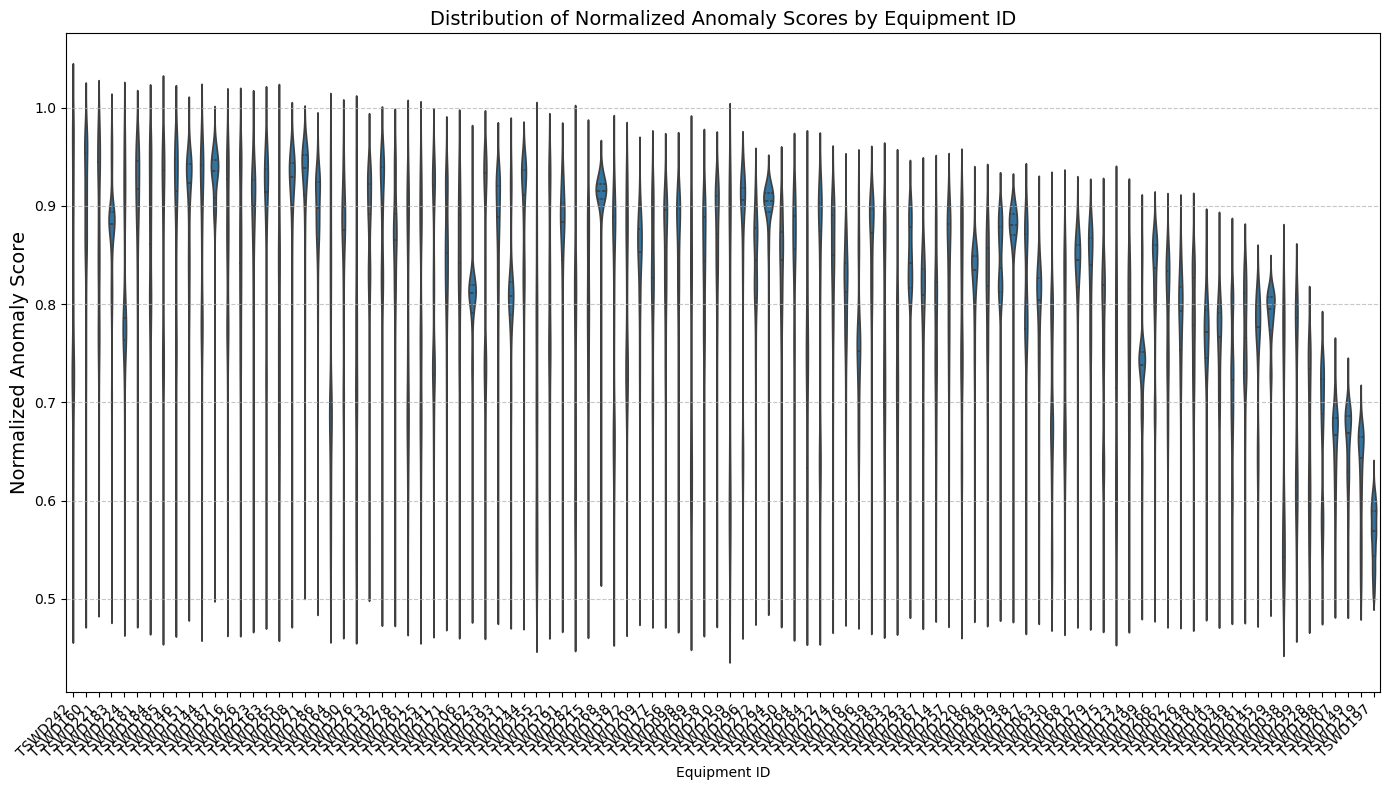

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style and size
plt.figure(figsize=(14, 8))

# Create violin plot (shows distribution density)
sns.violinplot(
    x='EquipID',
    y='AnomalyScore_normalized',
    data=anomalies_df,
    inner='quartile'  # Adds quartile lines inside the violin
)

# Improve readability
plt.title('Distribution of Normalized Anomaly Scores by Equipment ID', fontsize=14)
plt.xlabel('Equipment ID', fontsize=10)
plt.ylabel('Normalized Anomaly Score', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

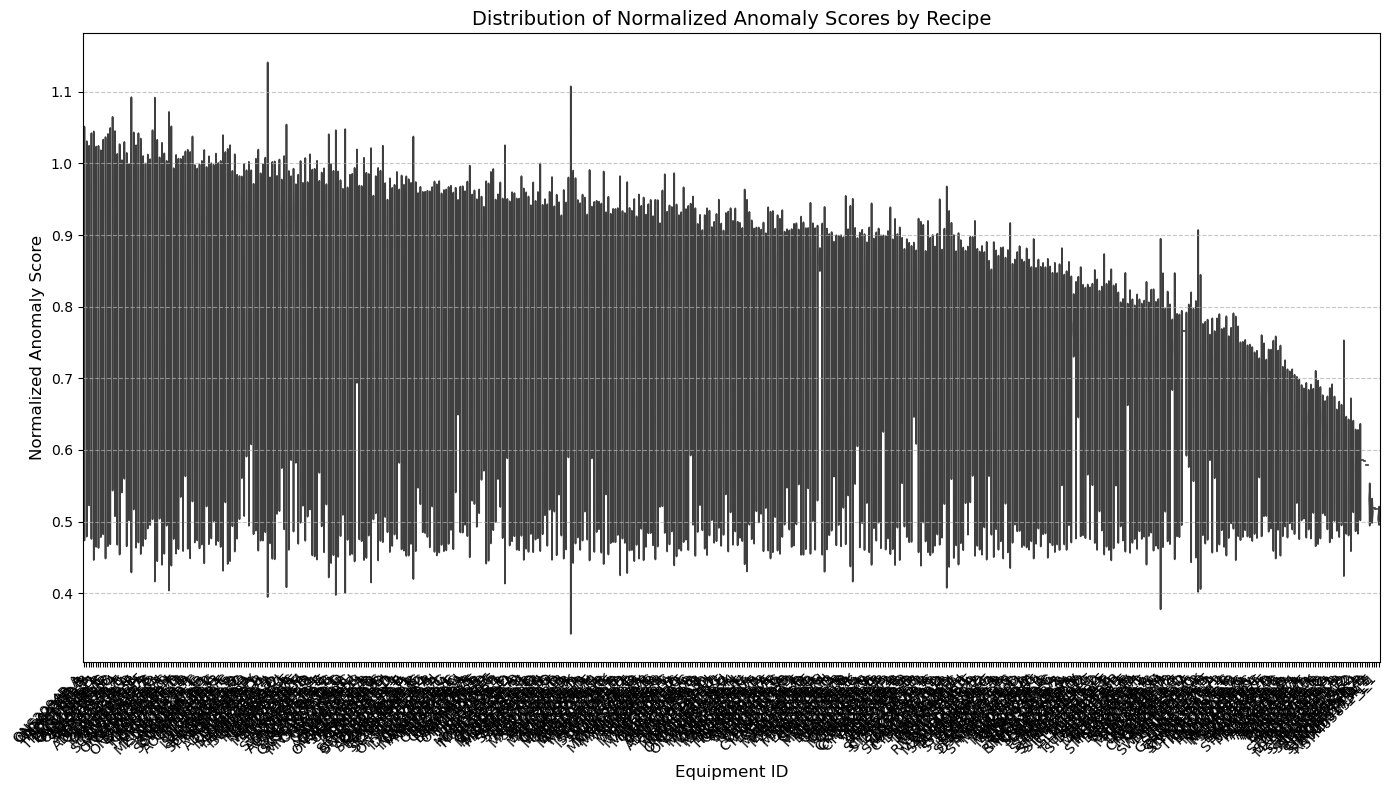

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style and size
plt.figure(figsize=(14, 8))

# Create violin plot (shows distribution density)
sns.violinplot(
    x='Recipe',
    y='AnomalyScore_normalized',
    data=anomalies_df,
    inner='quartile'  # Adds quartile lines inside the violin
)

# Improve readability
plt.title('Distribution of Normalized Anomaly Scores by Recipe', fontsize=14)
plt.xlabel('Equipment ID', fontsize=12)
plt.ylabel('Normalized Anomaly Score', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels

# Add gridlines for clarity
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [15]:
result.to_csv('output.csv', index=False)